# HW7 (total points 6)

# Use pandas API to finish problem in this notebook.
Total points 6

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
from io import BytesIO
from zipfile import ZipFile
import requests

**Let download movie lense dataset [MovieLens](https://grouplens.org/datasets/movielens/) and extract zip file using various python packages**

http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [3]:
r = requests.get("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
print(r.status_code)
zipfile = ZipFile(BytesIO(r.content))

200


In [4]:
zipfile.extractall()

In [5]:
! ls ml-latest-small/

README.txt  links.csv   movies.csv  ratings.csv tags.csv


In [6]:
! head  ./ml-latest-small/movies.csv

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children
9,Sudden Death (1995),Action


**It is a csv file.** We can use pandas read_csv to read this file into pandas DataFrame

In [7]:
# lets read movies.csv file
movie = pd.read_csv('./ml-latest-small/movies.csv')
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Q1 (.25 point) Check if any columns is null

In [8]:
# write pandas code here
movie.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [9]:
movie.shape

(9742, 3)

# Q 2 (.25 point) Check datatype of columns

In [10]:
# write pandas code here
movie.dtypes

movieId     int64
title      object
genres     object
dtype: object

# Q3 (.5 point) Using *str* on  series genres, build following  unique_genere set. It should contain all the unique genres from genres column. Print unique genres too.



In [11]:
# write pandas code here
unique_genre = pd.unique(movie.genres.str.split('|').sum())
unique_genre = set(unique_genre)
unique_genre

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [12]:
unique_genre =  pd.unique(movie.genres.str.split('|').sum())
#unique_genre = set(unique_genre)
#unique_genre
print(unique_genre)

['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'War' 'Musical'
 'Documentary' 'IMAX' 'Western' 'Film-Noir' '(no genres listed)']


# Q 4 (1 point) build columns for different genres with value True or False based on whether a  genre is present or not in an observation?



In [13]:
# write pandas code here
for genre in unique_genre:
    movie[genre] = movie.genres.map(lambda x: genre in x.split('|'))
movie.head()

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men (1995),Comedy|Romance,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False,False,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,5,Father of the Bride Part II (1995),Comedy,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Q5(1 point) Build year column in movie data frame. Year are embedded in title columns




Python regular expression  package **re** is very useful tool for text data handling.  This excercise is a very primitive use of it.


note
- . mean any character
- *. means "0 or more instances of the preceding regex token
- \[ matches a literal [ character
- [A-Za-z0-9] digits and lower, upper case, I think same as \w+
- '+' matches one more more times
- \d Matches any decimal digit

In [14]:
# write pandas code here
movie['year'] = ["".join(re.findall(r'\([0-9]{4,4}-*[0-9]*\)', year)) for year in movie['title']]
movie['year'] = movie['year'].str.replace(r'[\(\)]', '', regex=True)
movie['year'] = movie['year'].str.replace(r'^\s*$', 'NA', regex=True)

# Q6.(.5 point) Using seaborn, plot a bar plot of average number of movies per year. Do you see any trend?

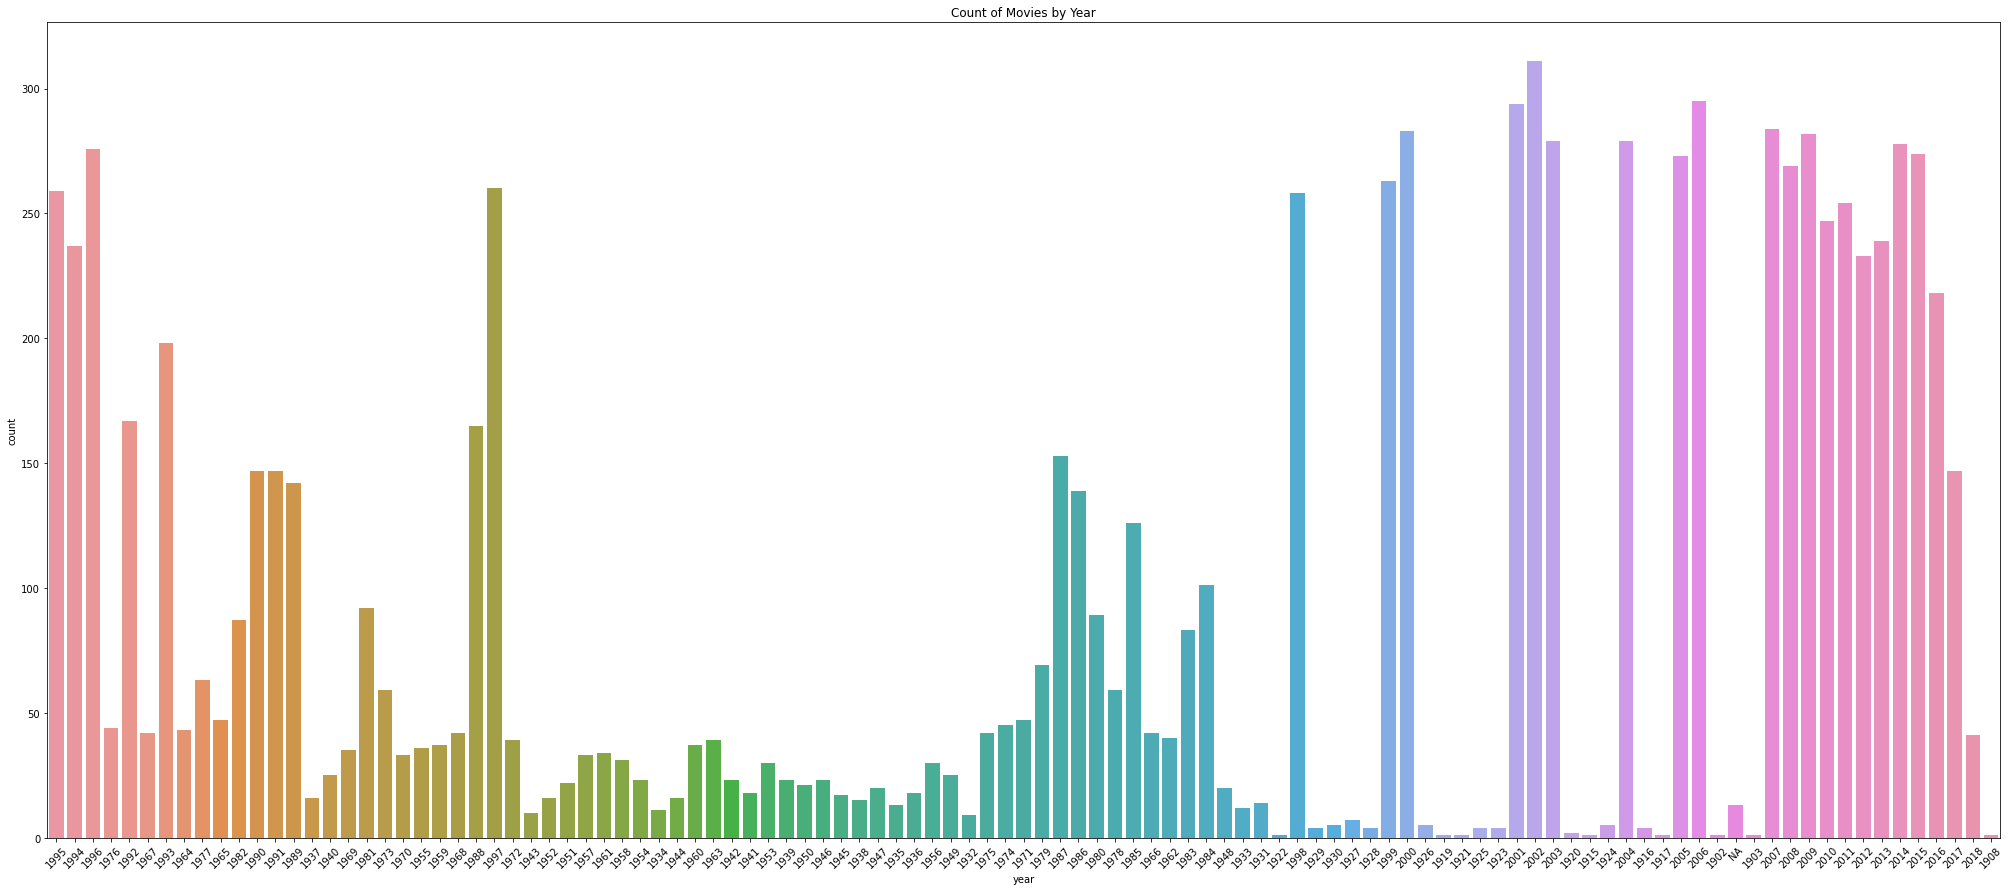

In [15]:
plt.figure(figsize=(35, 15))
count_plot = sns.countplot(x='year',data=movie)
count_plot.set_title('Count of Movies by Year')
count_plot.tick_params(axis='x', rotation=45)

# Q7.(1 point) Using matplotlib, plot total number of movies in different genres over the year. Plot should have proper title, axis labels and legends.

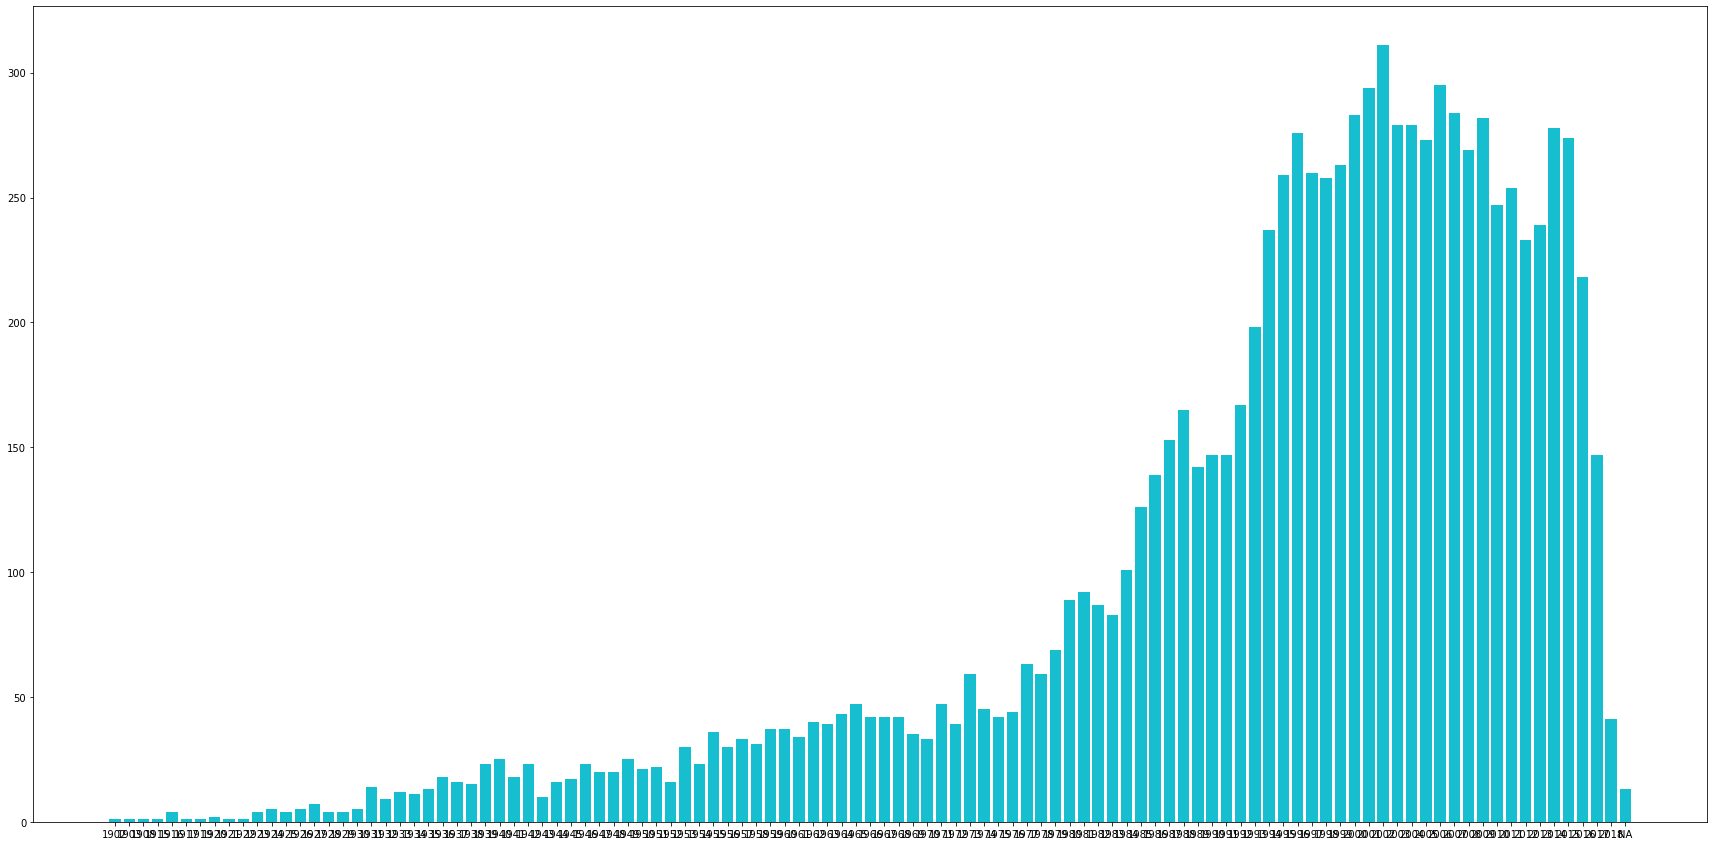

In [16]:
%matplotlib inline
# prepare the data
buckets =list(unique_genre)
movies_by_year_genre = movie.groupby(by='year').count()[buckets]
plt.figure(figsize=(30, 15))
color_number = 0
for col in buckets:
    plt.bar(movies_by_year_genre.index, movies_by_year_genre[col])

# Q 8 (.5 point) Build a *movie_title* column containing  the title of the movie(It should not contain year). Drop the original *title* columns. Display final movie dataFrame too.

In [17]:
 # write pandas code here
movie['title'] = movie['title'].replace(r'\([0-9]{4,4}-*[0-9]*\)', '', regex=True)
movie['title'] = movie['title'].str.strip()

# Q 9(1 point) Using seaborn, plot average number of words in a movie name over the year in different genres. Write your observation in no more than 2 lines.

<Figure size 2520x1080 with 0 Axes>

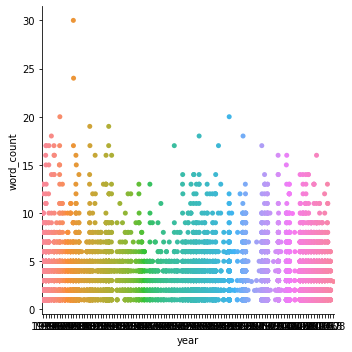

In [25]:
# Write code here.
words = nltk.RegexpTokenizer(pattern=r'\w+', gaps=False)
movie['word_count'] = movie['title'].apply(lambda x : len(words.tokenize(x)))
plt.figure(figsize=(35, 15))
plot = sns.catplot(x='year', y='word_count', data=movie)